### Блок теоретических вопросов

*Зачем мы взвешиваем энтропию по количеству попавших в вершину объектов?*: 

1. Для того, чтобы быстрее находить признаки для разбиения.
2. Для того, чтобы не было ужасных разбиений, выбранных в силу того, что в хорошей вершине оказалось очень мало объектов (например, верно разметили единственную точку).
3. Без взвешивания дерево не сможет оптимально, с точки зрения ошибки на обучающей выборке, подогнаться под данные





**Ответ: 2)** В действительности, на лекции разбирали похожий случай. При выборе лучшего предиката стоит учитывать долю объектов, которые отправляются в левую и правую вершины.

___________________________________________

*Если увеличивать обязательное количество объектов в получившейся вершине при разбиении, то логично предположить, что*: 

1.	Ошибка на обучающей и тестовых выборках будет падать
2.	Ошибка на обучающей выборке будет увеличиваться, а на тестовой падать до какого-то момента
3.	Нельзя точно определить
4.	Ошибка на тестовой выборке будет падать, насчет ошибки на обучающей выборке нельзя сказать точно


**Ответ: 2)** Если наше требование к количеству объектов в вершинах будет достаточно лояльным (скажем, не будет ограничений), то дерево окажется очень глубоким и переобучится. Ужесточение этого требования помогает решить эту проблему.
___________________________________________

*В каком случае дерево не сможет выдать на обучающей выборке 100-процентное качество (ограничений на глубину и другие гиперпараметры нет)?*: 

1.	Если зависимость между данными и таргетом слишком сложная для данного алгоритма
2.	По своей сути решающее дерево не гарантирует стопроцентное качество на обучающей выборке 
3.	Если используется неподходящий для этих данных критерий хаотичности  
4.	Если попадутся идентичные объекты с разными таргетами






**Ответ: 4)** На практике часто случается, что у одного того же объекта (или просто у идентичных объектов в нашем признаковом пространстве) разное значение таргета. Например, тот же самый клиент может либо кликать на рекламный банер, либо не кликать. В таком случае, как бы мы ни старались, для такого объекта нельзя будет иметь нулевую ошибку, так как он будет иметь 2 различных таргета, а предсказываем мы в классических задачах только один.

___________________________________________

### Блок практики

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap, ListedColormap
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

### Создадим синтетический датасет

X, y = make_classification(
    n_samples=200, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)


data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=['x1', 'x2', 'y'])

__Задание 1.__

Обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделяющую поверхность на трейне (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились? (2б)

In [2]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [3]:
### Разделим выборку

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

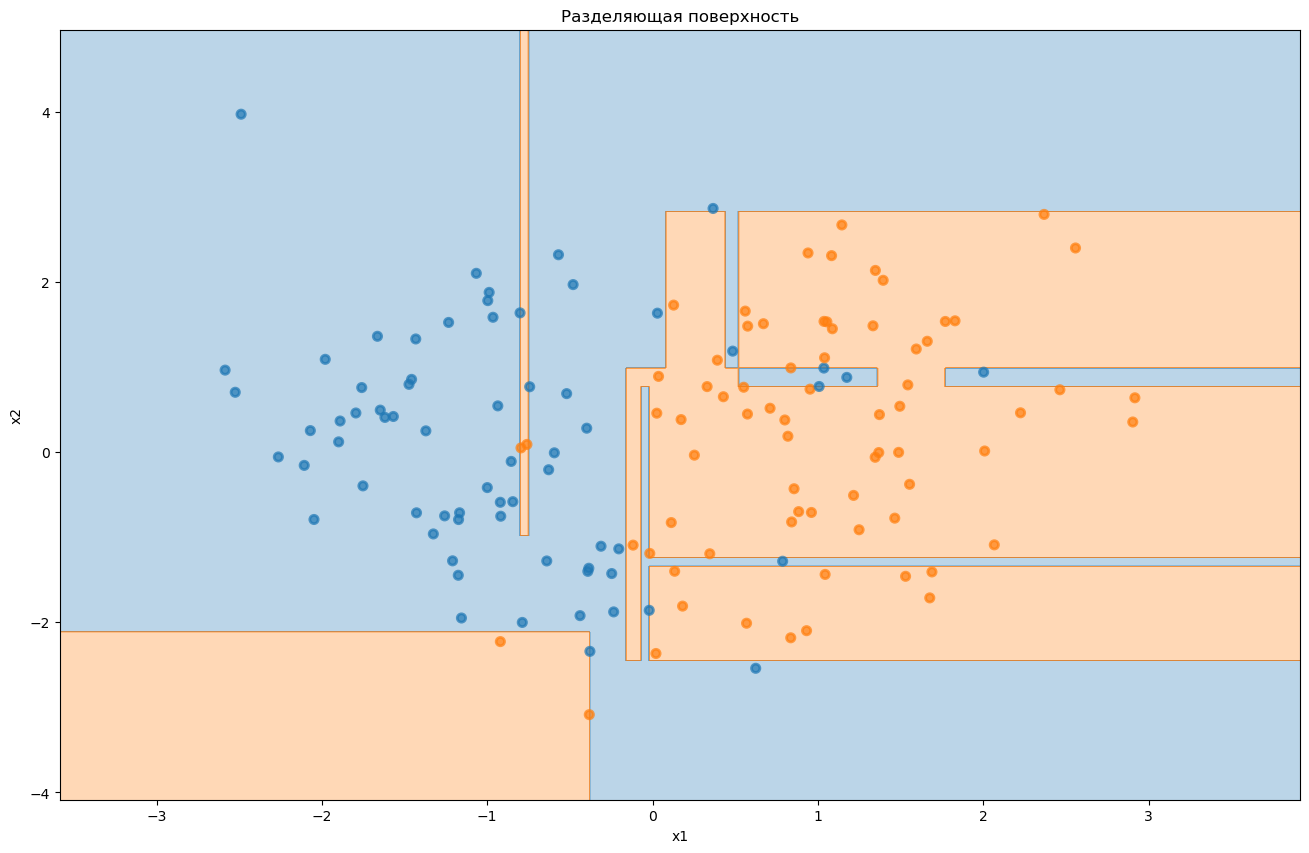

In [4]:
### Обучим дерево и нарисуем разделенную поверхность

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_train, y_train)

fig = plt.figure()
fig.set_size_inches(16, 10)

plot_surface(tree, X_train, y_train)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Разделяющая поверхность");

In [5]:
### Замерим качество работы

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, tree.predict(X_train))
test_acc = accuracy_score(y_test, tree.predict(X_test))
print('train_acc = ', train_acc, 'test_acc = ', test_acc)

train_acc =  1.0 test_acc =  0.8333333333333334


__Задание 2.__

Переберите несколько параметров для регуляризации (`max_depth`, `min_samples_leaf`) из предложенных. Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Используйте, если хотите, функцию ниже. Как изменение параметров влияет на поверхность? При каких параметрах на тесте достигается лучшее качество? А на трейне? (2б).

In [6]:
def plot_surface_axes(clf, X, y, ax, train_acc, test_acc):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
    edgecolors=np.array(palette)[y], linewidths=2)
    
    ax.plot([], [], label = 'train_acc : %0.5f' % train_acc)
    ax.plot([], [], label = 'test_acc : %0.5f' % test_acc)
    
    plt.legend(loc = 'lower right', prop={'size': 20})

In [7]:
### Зададим сетку гиперпараметров

max_depth_set = [6, 7, 8, 9, 12]

min_samples_leaf_set = [3, 5, 7, 10]

### Разделим выборку

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 42) 

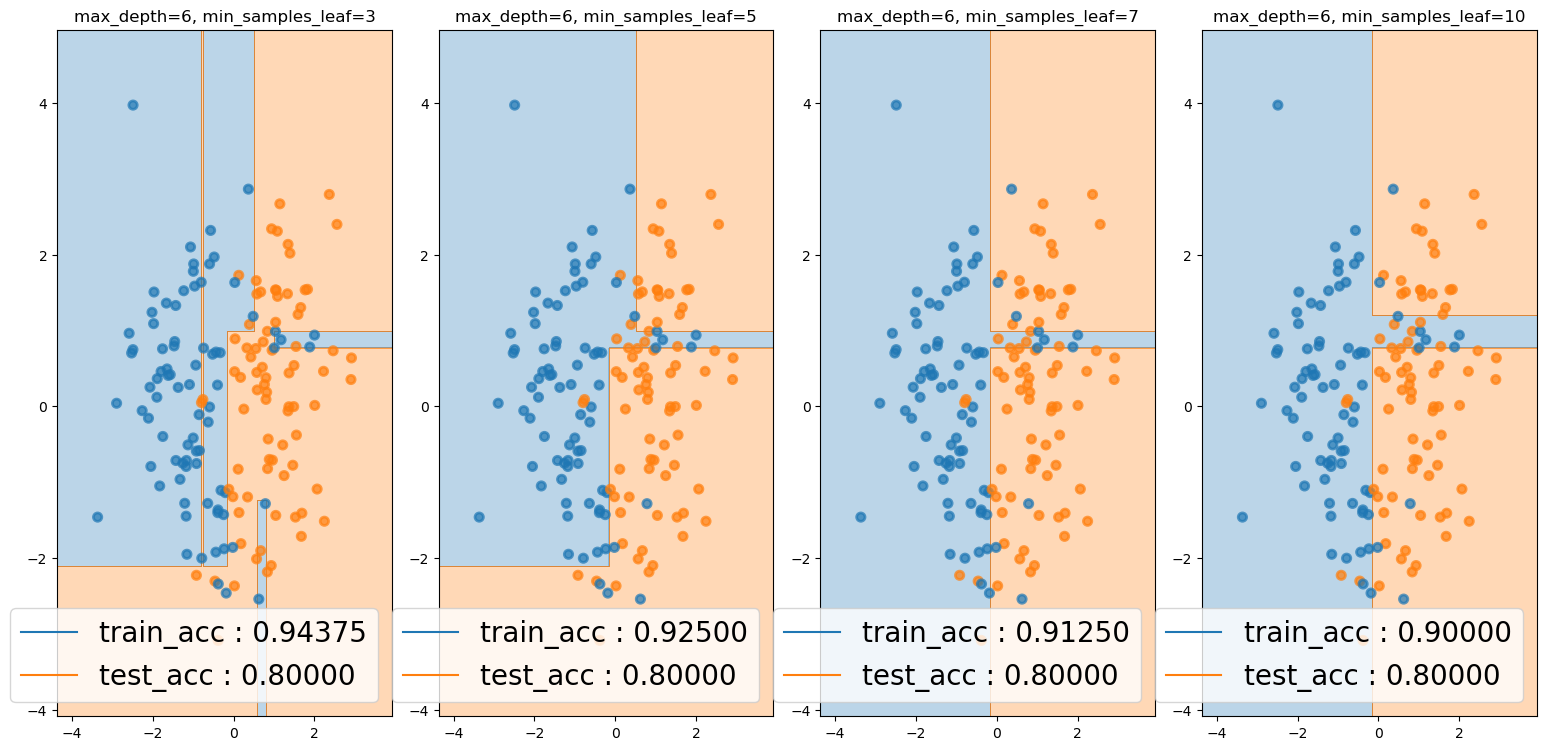

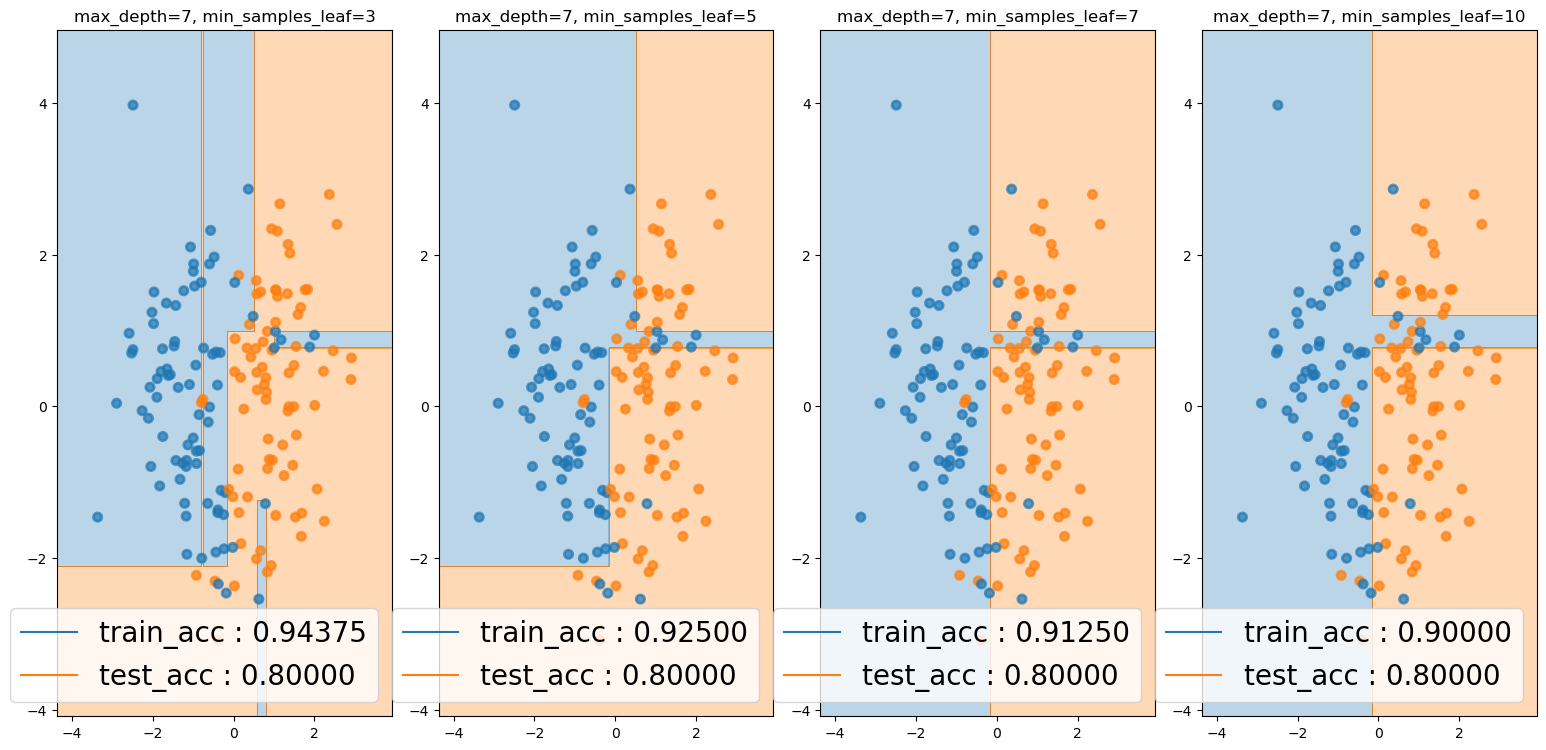

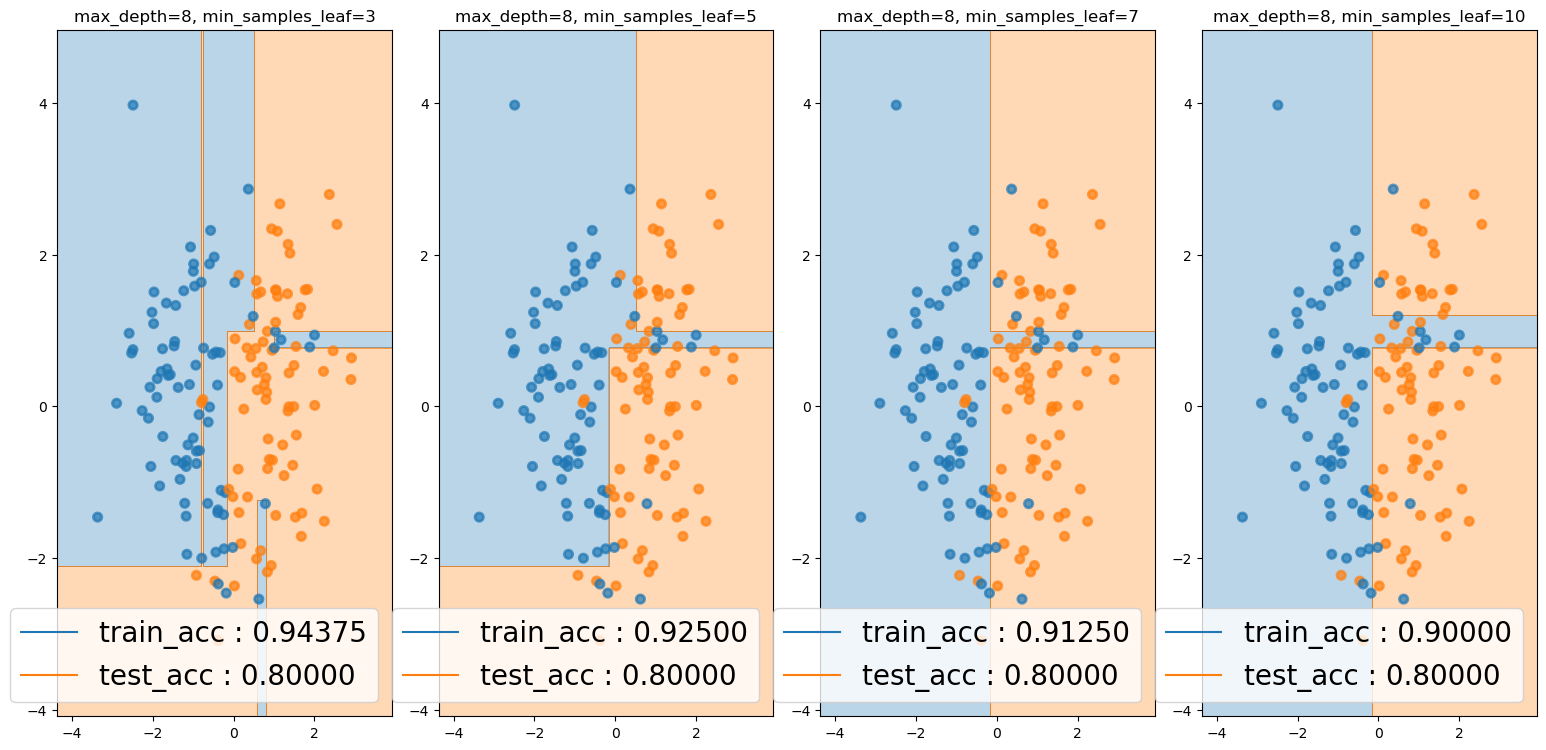

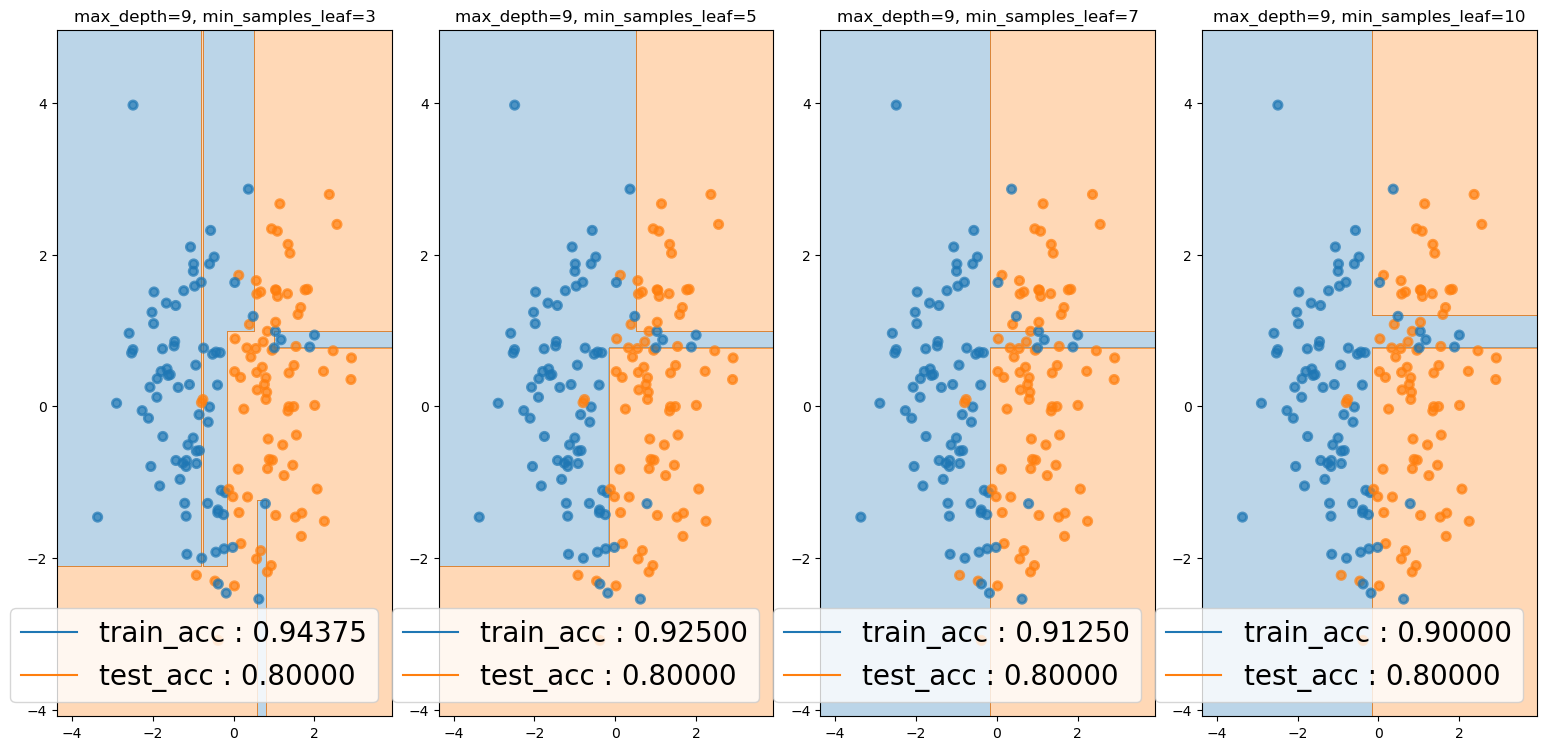

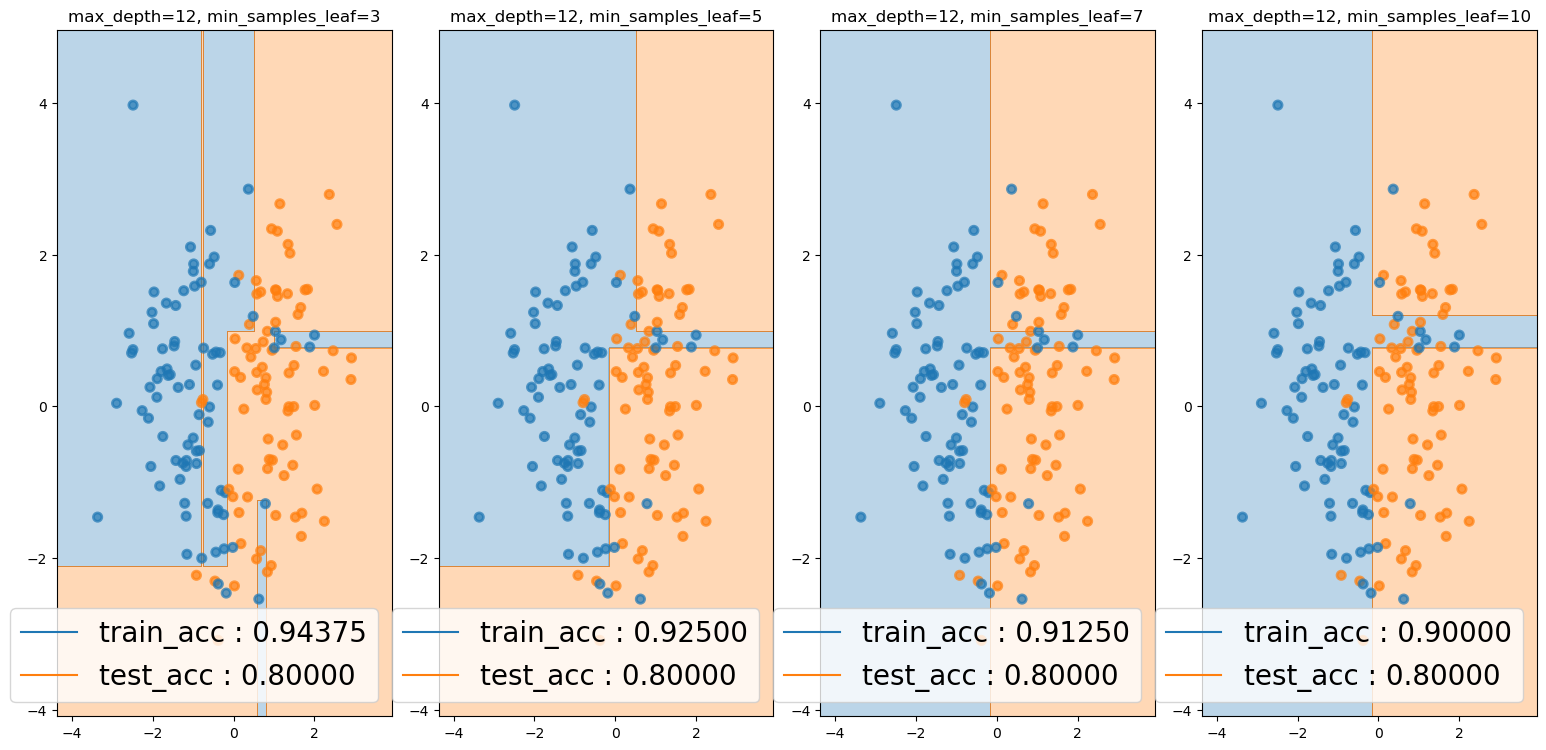

In [8]:
### Для разных комбинаций гиперпараметров
### Замерим качество и нарисуем поверхность

for max_depth in max_depth_set:

    i = 1 

    f = plt.figure(figsize=(16, 8))

    for min_samples_leaf in min_samples_leaf_set:
    
        tree = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf=min_samples_leaf).fit(X_train, y_train)

        ax = f.add_subplot(1, 4, i)
        
        train_acc = accuracy_score(y_train, tree.predict(X_train))
        test_acc = accuracy_score(y_test, tree.predict(X_test))
        
        plot_surface_axes(tree, X_train, y_train, ax, train_acc, test_acc)
    
      
        plt.title('max_depth={}, min_samples_leaf={}'.format(max_depth, min_samples_leaf))
    
        i+=1

__Задание 3.__

Добавим признак $2\cdot x_1 - x_2$, транформацию добавим как шаг пайплайна. С помощью данного класса обучите дерево с максимальной глубиной=3, нарисуйте поверхность на трейне, посчитайте accuracy

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print("Инициализировали класс!")
        
    def fit(self, X, y=None):
        print("Зафитили датасет!")
        return self
    
    def transform(self, X, y=None):
        
        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)
        
        print("Трансформировали датасет!")
        return X_

In [ ]:
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

from sklearn.pipeline import Pipeline

pipe = Pipeline([("custom_transformer", CustomFunctionTransformer("x1",
                                                                  "x2",
                                                                  lambda x,y: 2*x-y)),
                 ("decision_tree", DecisionTreeClassifier(max_depth=3))])

pipe.fit(X_train, y_train)

In [ ]:
fig = plt.figure()
fig.set_size_inches(16, 10) 

### Вычислим границы признакового пространства

pixel_step = 0.001

x1_min, x1_max = X_train.values[:, 0].min() - 1, X_train.values[:, 0].max() + 1
x2_min, x2_max = X_train.values[:, 1].min() - 1, X_train.values[:, 1].max() + 1

### Генерим много-много точек на плоскости

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

### Для каждой точки даем прогноз, чтобы покрыть поверхности

Z = pipe.predict(pd.DataFrame(np.c_[xx1.ravel(), xx2.ravel()], columns=["x1", "x2"]))
Z = Z.reshape(xx1.shape)

# Заполняем пространство

cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

plt.axis("tight")

### Рисуем точечки и обученные области

for i, n, c in zip(range(2), pipe.classes_, ["#FF5533", "#00B050"]):
    idx = np.where(y_train == i)
    plt.scatter(
        X_train.values[idx, 0],
        X_train.values[idx, 1],
        c=c,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
    
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Boundary")

plt.show()

In [ ]:
train_acc = accuracy_score(y_train, pipe.predict(X_train))
test_acc = accuracy_score(y_test, pipe.predict(X_test))
print('train_acc = ', train_acc, 'test_acc = ', test_acc)

Кажется, стало немного красивее! :)